In [22]:
#importing libraries
import pandas as pd
import numpy as np
import random as random
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def Dataframe_Load():
  #Supplier countries 
  # Created an empty dataframe with the required columns for suppliers
  supplier_details = pd.DataFrame(columns=['Supplier_ID','Country', 'lat', 'long', 'Volume', 'Time_taken'])
  #Reading world cities
  cities_df = pd.read_excel('worldcities.xlsx')
  df2 = cities_df.loc[(cities_df.country == "China") | (cities_df.country == "India") | (cities_df.country == "Japan")|(cities_df.country == "South Korea")|(cities_df.country == "France")]
  Supplier_Countries = df2.groupby('country').head(2)

  #Taking location o f manufracturer to find distance between other cities and US 
  us = cities_df.loc[(cities_df.country == "United States") ]
  us = us.head(1)
  return Supplier_Countries, us
  '''us["Current_Inventory_Level"] = random.randint(35000,50000)
  us["Max_Inventory_Level"] = 300000
  us["Inventory_Difference"] = us["Max_Inventory_Level"] - us['Current_Inventory_Level']
  print(us)'''

In [3]:
#Adding reqd columns and randomizing values of volume, time_taken
Supplier_Countries, us = Dataframe_Load()
def value_add(Supplier_Countries):
  #us_demand = float(us.Inventory_Difference)
  time1 = []
  vol = []
  material_volume_provided = []
  demand_satisfied = []
  count = 0
  for i in range(1,len(Supplier_Countries)+1):
    time1.append(random.randint(1,10))
    if i in [1,4,7]:
      vol.append(random.randint(1500,2000))
    elif i in [2,5,8,10]:
      vol.append(random.randint(2500,4000))
    else:
      vol.append(random.randint(750, 1000))
    #material_volume_provided.append(vol[count] - float(0.1*us_demand))
    #demand_satisfied.append(0.1*us_demand)
    #Supplier_Countries.drop(columns = "Material_Provided", inplace = True)
    #Supplier_Countries.drop(columns = "Supplier_ID", inplace = True)

    count = count + 1
    #demand_percentage.append((0.1*us['Demand']))
  time1.sort()
  Supplier_Countries["Volume"] = vol
  #Supplier_Countries["Material_Left"] = material_volume_provided
  #Supplier_Countries["Demand-Satisfied"] = demand_satisfied
  return Supplier_Countries

Supplier_Countries = value_add(Supplier_Countries)


In [4]:
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
def distance_calc(Supplier_Countries, us):
  #Calculated the distance of the suppliers from the manufacturing facility in USA
  distance1 = []
  lat1 = float(us["lat"])
  long1 = float(us["lng"])
  for index, row in Supplier_Countries.iterrows(): 
    lat2 = row['lat']
    long2 = row['lng']
    g = geod.Inverse(lat1, long1, lat2, long2)
    distance1.append(g['s12']/1000)
  Supplier_Countries["Distance_from_us"] = distance1
  Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
  return Supplier_Countries



'''  
#creating and visualizing network graph
import networkx as nx
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84

geod = Geodesic.WGS84

G = nx.DiGraph()
G.add_node(0, latitude = us["lat"], longitude= us["lng"])
distance1 = []
lat1 = float(us["lat"])
long1 = float(us["lng"])
for index, row in Supplier_Countries.iterrows(): 
    lat2 = row['lat']
    long2 = row['lng']
    G.add_node(row['id'], latitude = row['lat'], longitude = row['lng'])
    g = geod.Inverse(lat1, long1, lat2, long2)
    distance1.append(g['s12']/1000)
    if row['Demand-Satisfied']<=row['Volume']:
      cost = g['s12']/1000 * row['Demand-Satisfied']
    else:
      cost = g['s12']/1000 * row['Volume']
    G.add_edge(0, row['id'], dist=g['s12']/1000, cost1 = cost)
    distance = nx.get_edge_attributes(G, 'dist')
    c = nx.get_edge_attributes(G, 'cost1')
    print(f"Distance: {distance[(0, row['id'])]}, Cost: {c}")



#print(G.nodes())  
#print(G.edges()) 
longi = nx.get_node_attributes(G, "longitude")
#print(float(longi[1])) 

Supplier_Countries["Distance_from_us"] = distance1
Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
Supplier_Countries["Time_Taken"] = time1

nx.draw(G)'''

Supplier_Countries = distance_calc(Supplier_Countries, us)

In [5]:
# Randomizing variables for each order and adding specific materials supplied by each city and theor individual material costs
def Supplier_func_Week(Supplier_dataframe):
  Var1 = 0
  vol = []
  time2 = []
  Supplier_dataframe.sort_values(by = 'country', inplace=True)
  Supplier_dataframe['Material'] = ['Material_1', 'Material_2', 'Material_3', 'Material_1', 'Material_2', 'Material_3', 'Material_1', 'Material_2', 'Material_3', 'Material_2']
  Supplier_dataframe['Material_Costs'] = [5,6,12,7.5,7,10,8,8,11,10]
  for i in range(1,len(Supplier_Countries)+1):
    time2.append(random.randint(1,10))
    if i in [1,4,7]:
      vol.append(random.randint(1500,2000))
    elif i in [2,5,8,10]:
      vol.append(random.randint(3000,3500))
    else:
      vol.append(random.randint(1000, 1250))
  Supplier_dataframe['Volume'] = vol
  Supplier_dataframe["Time_Taken"] = time2
  #Setting time from low to high depending on the distance from the manufacturing center.

  Supplier_Countries.sort_values(by='Distance_from_us', ascending = True)
  time2.sort()
  
  #supply=Supplier_dataframe.groupby("Material").Volume.sum()
  Supplier_dataframe['Total_Costs'] = (Supplier_dataframe['Material_Costs']*Supplier_dataframe["Volume"])*(Supplier_dataframe['Distance_from_us']/10000)
  #cost_var = Supplier_dataframe.groupby("Material").Total_Costs.sum()
  #citywise_cost = Supplier_dataframe.groupby(['Material','city','Distance_from_us']).Total_Costs.sum()
  Supplier_dataframe['Per_Unit_Price'] = Supplier_dataframe.Total_Costs/Supplier_dataframe.Volume
  #if len(city_name) > 0:
  #  Var1 = Supplier_dataframe.loc[Supplier_dataframe.city .isin(city_name.to_list())][['Material','city','Volume']]
    #Supplier_Countries.at((Supplier_dataframe.loc[Supplier_dataframe.city .isin(city_name.to_list())].index),'Volume') = 0
  return Supplier_dataframe
Supplier_func_Week(Supplier_Countries.copy())

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,Volume,Distance_from_us,Material,Material_Costs,Time_Taken,Total_Costs,Per_Unit_Price
7,Shanghai,Shanghai,31.1667,121.4667,China,CN,CHN,Shanghai,admin,22118000.0,1156073548,1608,11892.421516,Material_1,5.0,8,9561.506899,5.946211
9,Guangzhou,Guangzhou,23.1288,113.2590,China,CN,CHN,Guangdong,admin,21489000.0,1156237133,3081,12899.735317,Material_2,6.0,1,23846.450707,7.739841
34,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11027000.0,1250015082,1006,5848.624736,Material_3,12.0,10,7060.459782,7.018350
937,Marseille,Marseille,43.2964,5.3700,France,FR,FRA,Provence-Alpes-Côte d’Azur,admin,868277.0,1250774071,1525,6316.399245,Material_1,7.5,10,7224.381636,4.737299
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604,3042,11770.780931,Material_2,7.0,2,25064.700915,8.239547
6,Mumbai,Mumbai,19.0758,72.8775,India,IN,IND,Mahārāshtra,admin,22186000.0,1356226629,1225,12554.672401,Material_3,10.0,8,15379.473691,12.554672
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764,1548,10875.131358,Material_1,8.0,9,13467.762674,8.700105
18,Ōsaka,Osaka,34.7520,135.4582,Japan,JP,JPN,Ōsaka,admin,15490000.0,1392419823,3436,11127.301019,Material_2,8.0,8,30586.725041,8.901841
5,Seoul,Seoul,37.5600,126.9900,South Korea,KR,KOR,Seoul,primary,22394000.0,1410836482,1041,11081.715312,Material_3,11.0,5,12689.672204,12.189887
220,Busan,Busan,35.1000,129.0403,South Korea,KR,KOR,Busan,admin,3453198.0,1410601465,3276,11290.184512,Material_2,10.0,3,36986.644462,11.290185


In [6]:
Sup_df = Supplier_func_Week(Supplier_Countries)
Material_1_inventory = Sup_df.loc[Sup_df.Material == 'Material_1']
Mat1 = 9000
# Function to return the exact amount of material required based on order qty. Maximum material supplied is provided from the cheapest supplier.
# Minimum material is obtained from the most expensive supplier. 
def Material_Return(Material_inventory, M1):
  Material_inventory.sort_values(by = ['Material','Per_Unit_Price'], inplace = True)
  supplier_number = len(Material_inventory)
  mat_dict = {}
  mat_dict[Material_inventory.Material.unique()[0]] = []
  count = 0
  # Checking for material volume provided by supplier being equal to or exceeding the required volume of material
  # If it does then break the loop else keep appending the material provided into a dictionary.
  for index,row in Material_inventory.iterrows():
      count = count + 1
      if M1 - row['Volume'] == 0:
        mat_dict[row['Material']].append(row[['city','Volume','Total_Costs', 'Time_Taken']])
        break
      elif M1 - row['Volume'] < 0:
        row1 = pd.DataFrame()
        row1['city'] = [row['city']]
        row1['Volume'] = [M1]
        row1['Total_Costs'] = [M1*row['Per_Unit_Price']]
        row1['Time_Taken']=row['Time_Taken']
        mat_dict[row['Material']].append(row1.iloc[0])
        break
      else:
        M1 = M1 - row['Volume']
        mat_dict[row['Material']].append(row[['city','Volume','Total_Costs', 'Time_Taken']])
  return mat_dict

Material_Return(Material_1_inventory, Mat1)

{'Material_1': [city           Marseille
  Volume              1741
  Total_Costs      8247.64
  Time_Taken             3
  Name: 937, dtype: object,
  city           Shanghai
  Volume             1837
  Total_Costs     10923.2
  Time_Taken           10
  Name: 7, dtype: object,
  city             Tokyo
  Volume            1501
  Total_Costs    13058.9
  Time_Taken           5
  Name: 0, dtype: object]}

In [7]:
#Function to obtain dataframe slice which provided the specific material and demand for each material. 
# Returns a dictionary for each of the 3 materials provided
def percentage_distr(M1, M2, M3, df):
  Material_1_inventory = df.loc[df.Material == 'Material_1']
  Material_2_inventory = df.loc[df.Material == 'Material_2']
  Material_3_inventory = df.loc[df.Material == 'Material_3']
  return Material_Return(Material_1_inventory, M1), Material_Return(Material_2_inventory, M2), Material_Return(Material_3_inventory, M3)

#Function to create a dataframe with the required material amounts. This dataframe is regenerated every 10 days 
def Supply_run(var1):
  var2 = {}
  var3 = {}
  count = 0
  df_1 = pd.DataFrame()
  for value in var1:
    var2.update(value)
  for value in var2.keys():
    var3 = {}
    for value1 in range(0, len(var2[value])):
      var3['Material'] = value
      var3['city'] = var2[value][value1]['city']
      var3['Volume'] = var2[value][value1]['Volume']
      var3['Total_Costs'] = var2[value][value1]['Total_Costs']
      var3['Time_Taken'] = var2[value][value1]['Time_Taken']
      df_1 = df_1.append([var3], ignore_index= True)
  return df_1

In [8]:
#Manufacturing inventory 
def manufacturing_inventory_load():
  in_fac = []

  max_storage = {"Material1":10000, 'Material2':20000, 'Material3':10000}
  manu_capacity_per_day = 40
  unit = {"Material1": 10, "Material2":20, "Material3":5}
  needed_daily = {"Material1":400, 'Material2':800, 'Material3':200}
  needed_weekly = {"Material1":2800, 'Material2':5600, 'Material3':1400}

  for i in range(0,3):
    in_fac.append(random.randint(5000,7000))


  m_inventory = {'Name':['Material1', 'Material2', 'Material3'],
          'In_Factory': in_fac, 'Needed_Daily': list(needed_daily.values()), "Needed_Weekly" : list(needed_weekly.values())}

  deficit = [0,0,0]

  #print(m_inventory['In_Factory'])
  # Create DataFrame
  manufacturing_inventory = pd.DataFrame(m_inventory)
  #print(manufacturing_inventory.loc[manufacturing_inventory['Name']=='Material1'].Needed_Weekly)
  
  # Print the output.   
  return manufacturing_inventory
manufacturing_inventory_load()

,Name,In_Factory,Needed_Daily,Needed_Weekly
0,Material1,6400,400,2800
1,Material2,5864,800,5600
2,Material3,6473,200,1400


In [9]:
#Days to complete the order 
def days_to_make_items(qty):
  manu_capacity_per_day = 40
  days_needed = math.ceil(qty/manu_capacity_per_day)
  return days_needed

#Number of materials needed to complete the order 
def qty_to_make_items(manufacturing_inventory, quantity):
  need1 = 0
  need2 = 0
  need3 = 0
  unit = {"Material1": 10, "Material2":20, "Material3":5}
  m1_needed = unit['Material1']*quantity
  m2_needed = unit['Material2']*quantity
  m3_needed = unit['Material3']*quantity
  if manufacturing_inventory['In_Factory'][0] < m1_needed:
    need1 = m1_needed - manufacturing_inventory['In_Factory'][0]
    print(f"Material 1 needed: {need1}")
  else:
    print(f"Material 1 present: {m1_needed}")
  if manufacturing_inventory['In_Factory'][1] < m2_needed:
    need2 = m2_needed - manufacturing_inventory['In_Factory'][1]
    print(f"Material 2 needed: {need2}")
  else:
    print(f"Material 2 present: {m2_needed}")
  if manufacturing_inventory['In_Factory'][2] < m3_needed:
    need3 = m3_needed - manufacturing_inventory['In_Factory'][2]
    print(f"Material 3 needed: {need3}")
  else:
    print(f"Material 3 present: {m3_needed}")
  return need1, need2, need3

In [10]:
#Seeing for random order numbers

def orders(manufacturing_inven, qty):
  mat_req = []
  #for i in range(0,1):
  print(f"For order qty: {qty}")
  M1,M2,M3 = qty_to_make_items(manufacturing_inven, qty)
  mat_req.append(M1)
  mat_req.append(M2)
  mat_req.append(M3)
  return(mat_req)
  
#orders
#mat_req

In [11]:
#daily simulation

#days = math.floor(min(manufacturing_inventory['In_Factory']/manufacturing_inventory['Needed Daily']))
#days


In [12]:
#to_supplier = [orders()]

In [13]:
# days to complete the order

def days_to_complete(order_qty):
  manu_capacity_per_day = 40
  days_to_complete = math.ceil(order_qty/manu_capacity_per_day)
  return days_to_complete

In [14]:
#Reducing inventory level each day
'''
day = 1
flag = 0
count = 1
Df1 = Supplier_func_Week(Supplier_Countries.copy())
for i in range(0,days_to_complete(600)):
  print(f"Day : {day}")
  for index, row in manufacturing_inventory.iterrows():
    count +=1
    sub = row['In_Factory']- row['Needed Daily']
    if sub<= 0 :
      manufacturing_inventory.at[index,'In_Factory'] = 0
      flag = 1
    else:
      #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
      manufacturing_inventory.at[index,'In_Factory'] = sub
  count = count + 1
  day+=1
  print(manufacturing_inventory)
  if flag ==1:
    break

'''
#deficit

'\nday = 1\nflag = 0\ncount = 1\nDf1 = Supplier_func_Week(Supplier_Countries.copy())\nfor i in range(0,days_to_complete(600)):\n  print(f"Day : {day}")\n  for index, row in manufacturing_inventory.iterrows():\n    count +=1\n    sub = row[\'In_Factory\']- row[\'Needed Daily\']\n    if sub<= 0 :\n      manufacturing_inventory.at[index,\'In_Factory\'] = 0\n      flag = 1\n    else:\n      #manufacturing_inventory.iloc[index].replace(to_replace=row[\'In_Factory\'], value = sub)\n      manufacturing_inventory.at[index,\'In_Factory\'] = sub\n  count = count + 1\n  day+=1\n  print(manufacturing_inventory)\n  if flag ==1:\n    break\n\n'

In [15]:
#Reducing inventory level each day
'''
day = 1
flag = 0
count = 1
Df1 = Supplier_func_Week(Supplier_Countries.copy())
Df2 = Supply_run(percentage_distr(mat_req[0],mat_req[1],mat_req[2],Df1))
for i in range(0,days_to_complete(900)):
  supply_df = Df2.loc[Df2.Time_Taken == i]
  if len(supply_df) > 0:
    if len(supply_df.loc[supply_df.Material == 'Material_1']) > 0:
      manufacturing_inventory.at[0, 'In_Factory'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == 'Material_1'].Volume.sum()
    if len(supply_df.loc[supply_df.Material == 'Material_2']) > 0:
      manufacturing_inventory.at[1, 'In_Factory'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == 'Material_2'].Volume.sum()
      if len(supply_df.loc[supply_df.Material == 'Material_3']) > 0:
        manufacturing_inventory.at[2, 'In_Factory'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == 'Material_3'].Volume.sum()
  print(supply_df)
  print(f"Day : {day}")
  for index, row in manufacturing_inventory.iterrows():
    count +=1
    sub = row['In_Factory']- row['Needed Daily']
    if sub<= 0 :
      manufacturing_inventory.at[index,'In_Factory'] = 0
      flag = 1
    else:
      #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
      manufacturing_inventory.at[index,'In_Factory'] = sub
  count = count + 1
  day+=1
  print(manufacturing_inventory)
  if flag ==1:
    break
'''

'\nday = 1\nflag = 0\ncount = 1\nDf1 = Supplier_func_Week(Supplier_Countries.copy())\nDf2 = Supply_run(percentage_distr(mat_req[0],mat_req[1],mat_req[2],Df1))\nfor i in range(0,days_to_complete(900)):\n  supply_df = Df2.loc[Df2.Time_Taken == i]\n  if len(supply_df) > 0:\n    if len(supply_df.loc[supply_df.Material == \'Material_1\']) > 0:\n      manufacturing_inventory.at[0, \'In_Factory\'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == \'Material_1\'].Volume.sum()\n    if len(supply_df.loc[supply_df.Material == \'Material_2\']) > 0:\n      manufacturing_inventory.at[1, \'In_Factory\'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == \'Material_2\'].Volume.sum()\n      if len(supply_df.loc[supply_df.Material == \'Material_3\']) > 0:\n        manufacturing_inventory.at[2, \'In_Factory\'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == \'Material_3\'].Volume.sum()\n  print(supply_df)\

Please enter the number of times you wish for the simulation to run: 10
For order qty: 6132
Material 1 needed: 55818
Material 2 needed: 117541
Material 3 needed: 25149
          city city_ascii      lat       lng      country iso2 iso3  \
7     Shanghai   Shanghai  31.1667  121.4667        China   CN  CHN   
9    Guangzhou  Guangzhou  23.1288  113.2590        China   CN  CHN   
34       Paris      Paris  48.8566    2.3522       France   FR  FRA   
937  Marseille  Marseille  43.2964    5.3700       France   FR  FRA   
2        Delhi      Delhi  28.6667   77.2167        India   IN  IND   
6       Mumbai     Mumbai  19.0758   72.8775        India   IN  IND   
0        Tokyo      Tokyo  35.6839  139.7744        Japan   JP  JPN   
18       Ōsaka      Osaka  34.7520  135.4582        Japan   JP  JPN   
5        Seoul      Seoul  37.5600  126.9900  South Korea   KR  KOR   
220      Busan      Busan  35.1000  129.0403  South Korea   KR  KOR   

                     admin_name  capital  populati

327245.04425976763
Day : 19
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        4276           400           2800
1  Material2       14669           800           5600
2  Material3        8285           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
327245.04425976763
Day : 20
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        3876           400           2800
1  Material2       13869           800           5600
2  Material3        8085           200           1400
For order qty: 3587
Material 1 needed: 31994
Material 2 needed: 57871
Material 3 needed: 9850
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314        26.0
1  Material_1   Shanghai    1623   9650.700061        26.0
2  Material_1      Tokyo    1507  13111.058365        30.0
3  Material_2  Guangzhou    3148  24365.020066     

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314        46.0
1  Material_1   Shanghai    1623   9650.700061        46.0
2  Material_1      Tokyo    1507  13111.058365        50.0
3  Material_2  Guangzhou    3148  24365.020066        44.0
4  Material_2      Delhi    3093  25484.917795        47.0
5  Material_2      Ōsaka    3084  27453.277074        42.0
6  Material_2      Busan    3060  34547.964607        43.0
7  Material_3      Paris    1110   7790.368149        46.0
8  Material_3      Seoul    1125  13713.622698        48.0
9  Material_3     Mumbai    1052  13207.515366        44.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
654490.0885195353
Day : 41
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1850           400           2800
1  Material2       21839           800           5600
2  Material3       10459       

9  Material_3     Mumbai    1052  13207.515366        64.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
981735.1327793028
Day : 61
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       33809           800           5600
2  Material3       13833           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
981735.1327793028
Day : 62
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2       33009           800           5600
2  Material3       13633           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074        62.0
1009188.4098537785
Day : 63
        N

2  Material3       16335           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1293090.886567683
Day : 82
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2       46579           800           5600
2  Material3       16135           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074        82.0
1320544.1636421587
Day : 83
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2       48863           800           5600
2  Material3       15935           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    3060  34547.964607        83.0
1355092.12824914

2  Material3       18222           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
163622.52212988382
Day : 102
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2       60149           800           5600
2  Material3       18022           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074       102.0
191075.7992043596
Day : 103
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2       62433           800           5600
2  Material3       17822           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    3060  34547.964607       103.0
225623.7638113

9  Material_3     Mumbai    1052  13207.515366       124.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
490867.5663896515
Day : 121
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       74519           800           5600
2  Material3       21996           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
490867.5663896515
Day : 122
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2       73719           800           5600
2  Material3       21796           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074       122.0
518320.8434641273
Day : 123
       

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       146.0
1  Material_1   Shanghai    1623   9650.700061       146.0
2  Material_1      Tokyo    1507  13111.058365       150.0
3  Material_2  Guangzhou    3148  24365.020066       144.0
4  Material_2      Delhi    3093  25484.917795       147.0
5  Material_2      Ōsaka    3084  27453.277074       142.0
6  Material_2      Busan    3060  34547.964607       143.0
7  Material_3      Paris    1110   7790.368149       146.0
8  Material_3      Seoul    1125  13713.622698       148.0
9  Material_3     Mumbai    1052  13207.515366       144.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
818112.610649419
Day : 141
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       88089           800           5600
2  Material3       25770       

2  Material3       29344           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074       162.0
1172810.9319836623
Day : 163
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2      103143           800           5600
2  Material3       29144           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    3060  34547.964607       163.0
1207358.8965906487
Day : 164
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      106203           800           5600
2  Material3       29144           200           1400
Inventory is:  5160
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guan

9  Material_3     Mumbai    1052  13207.515366       184.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1472602.699168954
Day : 181
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      115229           800           5600
2  Material3       33318           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1472602.699168954
Day : 182
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      114429           800           5600
2  Material3       33118           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074       182.0
1500055.9762434298
Day : 183
      

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       206.0
1  Material_1   Shanghai    1623   9650.700061       206.0
2  Material_1      Tokyo    1507  13111.058365       210.0
3  Material_2  Guangzhou    3148  24365.020066       204.0
4  Material_2      Delhi    3093  25484.917795       207.0
5  Material_2      Ōsaka    3084  27453.277074       202.0
6  Material_2      Busan    3060  34547.964607       203.0
7  Material_3      Paris    1110   7790.368149       206.0
8  Material_3      Seoul    1125  13713.622698       208.0
9  Material_3     Mumbai    1052  13207.515366       204.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1799847.7434287216
Day : 201
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      128799           800           5600
2  Material3       37092     

2  Material3       40255           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    3060  34547.964607       223.0
2186444.9934933246
Day : 224
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      146913           800           5600
2  Material3       40255           200           1400
Inventory is:  6840
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guangzhou    3148  24365.020066       224.0
2210810.0135596534
Day : 225
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      150061           800           5600
2  Material3       40255           200           1400
Inventory is:  6840
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, 

2432369.931386458
Day : 243
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2      157423           800           5600
2  Material3       40255           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    2956  33373.785418       243.0
2465743.7168041877
Day : 244
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      160379           800           5600
2  Material3       40255           200           1400
Inventory is:  7400
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guangzhou    3148  24365.020066       244.0
2490108.7368705166
Day : 245
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      163527          

2666147.8111269884
Day : 267
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2787           400           2800
1  Material2      163368           800           5600
2  Material3       41165           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
4  Material_2  Delhi    2452  20203.368391       267.0
2686351.1795176654
Day : 268
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      165020           800           5600
2  Material3       40965           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       268.0
2689886.2467021313
Day : 269
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      164220           800           5600
2  Materi

4  Material_2  Delhi    2452  20203.368391       287.0
2832258.499847011
Day : 288
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      165020           800           5600
2  Material3       40965           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       288.0
2835793.567031477
Day : 289
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      164220           800           5600
2  Material3       41055           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2835793.567031477
Day : 290
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      163420           8

4  Material_3      Paris       0      0.000000       316.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
72953.66016467285
Day : 311
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      162620           800           5600
2  Material3       40655           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
72953.66016467285
Day : 312
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      161820           800           5600
2  Material3       40455           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
72953.66016467285
Day : 313
        Name  In_Factory  Needed

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       346.0
1  Material_1   Shanghai    1623   9650.700061       346.0
2  Material_1      Tokyo    1507  13111.058365       350.0
3  Material_2  Guangzhou    3148  24365.020066       344.0
4  Material_2      Delhi    1272  10480.703341       347.0
5  Material_3      Paris    1105   7755.276400       346.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
124133.16928774187
Day : 341
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      145820           800           5600
2  Material3       36455           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
124133.16928774187
Day : 342
        Name  In_Factory  Needed_Daily  Needed_Week

329701.3257995293
Day : 369
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      146240           800           5600
2  Material3       36560           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
329701.3257995293
Day : 370
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      145440           800           5600
2  Material3       36360           200           1400
For order qty: 7552
Material 1 needed: 73933
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       376.0
1  Material_1   Shanghai    1623   9650.700061       376.0
2  Material_1      Tokyo    1507  13111.058365       380.0
3  Material_2  Guangzhou    3148  24365.020066      

6  Material_3      Seoul     290   3535.067184       398.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
475608.6461288751
Day : 391
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      144640           800           5600
2  Material3       36160           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
475608.6461288751
Day : 392
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      143840           800           5600
2  Material3       35960           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
475608.6461288751
Day : 393
        Name  In_Factory  Needed

2  Material3       36670           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
4  Material_2  Delhi    2452  20203.368391       417.0
690934.5594384276
Day : 418
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      147040           800           5600
2  Material3       36470           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       418.0
694469.6266228935
Day : 419
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      146240           800           5600
2  Material3       36560           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
694469.6266228935

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       446.0
1  Material_1   Shanghai    1623   9650.700061       446.0
2  Material_1      Tokyo    1507  13111.058365       450.0
3  Material_2  Guangzhou    3148  24365.020066       444.0
4  Material_2      Delhi    2452  20203.368391       447.0
5  Material_3      Paris    1110   7790.368149       446.0
6  Material_3      Seoul     290   3535.067184       448.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
840376.946952239
Day : 441
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      144640           800           5600
2  Material3       36160           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
840376.946952239
Day : 

      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       468.0
1059237.9274462573
Day : 469
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      146240           800           5600
2  Material3       36560           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1059237.9274462573
Day : 470
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      145440           800           5600
2  Material3       36360           200           1400
For order qty: 7552
Material 1 needed: 73933
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       476.0
1  Material_1   Shanghai    1623   9650.700061       476.0


     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       496.0
1  Material_1   Shanghai    1623   9650.700061       496.0
2  Material_1      Tokyo    1507  13111.058365       500.0
3  Material_2  Guangzhou    3148  24365.020066       494.0
4  Material_2      Delhi    2452  20203.368391       497.0
5  Material_3      Paris    1110   7790.368149       496.0
6  Material_3      Seoul     290   3535.067184       498.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1205145.247775603
Day : 491
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      144640           800           5600
2  Material3       36160           200           1400
The profit obtained for this order is  748454.7522243969
Inventory made for this order is  5280
Costs for each order  1205145.247775603
The materials sup

4  Material_3      Paris       0      0.000000       526.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
107073.33291338553
Day : 521
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      133440           800           5600
2  Material3       33360           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
107073.33291338553
Day : 522
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      132640           800           5600
2  Material3       33160           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
107073.33291338553
Day : 523
        Name  In_Factory  Nee

Day : 550
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      124560           800           5600
2  Material3       31140           200           1400
For order qty: 6508
Material 1 needed: 63493
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       556.0
1  Material_1   Shanghai    1623   9650.700061       556.0
2  Material_1      Tokyo    1507  13111.058365       560.0
3  Material_2  Guangzhou    3148  24365.020066       554.0
4  Material_2      Delhi    2452  20203.368391       557.0
5  Material_3      Paris    1110   7790.368149       556.0
6  Material_3      Seoul     290   3535.067184       558.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
228578.19731545664
Day : 551
        Name  In_Factory  Needed_Daily  Needed_We

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       576.0
1  Material_1   Shanghai    1623   9650.700061       576.0
2  Material_1      Tokyo    1507  13111.058365       580.0
3  Material_2  Guangzhou    3148  24365.020066       574.0
4  Material_2      Delhi    2452  20203.368391       577.0
5  Material_3      Paris    1110   7790.368149       576.0
6  Material_3      Seoul     290   3535.067184       578.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
374485.51764480234
Day : 571
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      123760           800           5600
2  Material3       30940           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
374485.51764480234
Da

2  Material3       31450           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
4  Material_2  Delhi    2452  20203.368391       597.0
589811.4309543549
Day : 598
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      126160           800           5600
2  Material3       31250           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       598.0
593346.4981388209
Day : 599
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      125360           800           5600
2  Material3       31340           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
593346.4981388209

 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
739253.8184681664
Day : 620
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      124560           800           5600
2  Material3       31140           200           1400
For order qty: 6508
Material 1 needed: 63493
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       626.0
1  Material_1   Shanghai    1623   9650.700061       626.0
2  Material_1      Tokyo    1507  13111.058365       630.0
3  Material_2  Guangzhou    3148  24365.020066       624.0
4  Material_2      Delhi    2452  20203.368391       627.0
5  Material_3      Paris    1110   7790.368149       626.0
6  Material_3      Seoul     290   3535.067184       628.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Cos

3  Material_2  Guangzhou    3148  24365.020066       644.0
909526.1588638409
Day : 645
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      125308           800           5600
2  Material3       30540           200           1400
Inventory is:  18600
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
909526.1588638409
Day : 646
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      125308           800           5600
2  Material3       30540           200           1400
Inventory is:  18600
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Taken
0  Material_1  Marseille    1564  7409.136314       646.0
1  Material_1   Shanghai    1623  9650.700061       646.0
5  Material_3      Paris    1110  7790.368149       646.0
93

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       676.0
1  Material_1   Shanghai    1623   9650.700061       676.0
2  Material_1      Tokyo    1507  13111.058365       680.0
3  Material_2  Guangzhou       0      0.000000       674.0
4  Material_3      Paris       0      0.000000       676.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
90013.49653902919
Day : 671
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      118160           800           5600
2  Material3       29540           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
90013.49653902919
Day : 672
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  M

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       706.0
1  Material_1   Shanghai    1623   9650.700061       706.0
2  Material_1      Tokyo    1507  13111.058365       710.0
3  Material_2  Guangzhou       0      0.000000       704.0
4  Material_3      Paris       0      0.000000       706.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
141193.0056620982
Day : 701
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      101360           800           5600
2  Material3       25340           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
141193.0056620982
Day : 702
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  M

6  Material_3      Seoul     290   3535.067184       738.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
213450.14630153697
Day : 731
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       86780           800           5600
2  Material3       21695           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
213450.14630153697
Day : 732
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2       85980           800           5600
2  Material3       21495           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
213450.14630153697
Day : 733
        Name  In_Factory  Nee

428776.05961108964
Day : 758
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2       89180           800           5600
2  Material3       22005           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       758.0
432311.1267955556
Day : 759
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2       88380           800           5600
2  Material3       22095           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
432311.1267955556
Day : 760
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2       87580           800           5600
2  Material3       21895           2

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       786.0
1  Material_1   Shanghai    1623   9650.700061       786.0
2  Material_1      Tokyo    1507  13111.058365       790.0
3  Material_2  Guangzhou    3148  24365.020066       784.0
4  Material_2      Delhi    3093  25484.917795       787.0
5  Material_2      Ōsaka    3084  27453.277074       782.0
6  Material_2      Busan    3060  34547.964607       783.0
7  Material_3      Paris    1110   7790.368149       786.0
8  Material_3      Seoul    1125  13713.622698       788.0
9  Material_3     Mumbai    1052  13207.515366       784.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
72953.66016467285
Day : 781
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       86780           800           5600
2  Material3       21695      

427651.98149891634
Day : 803
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2      101834           800           5600
2  Material3       25069           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
6  Material_2  Busan    3060  34547.964607       803.0
462199.94610590284
Day : 804
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      104894           800           5600
2  Material3       25069           200           1400
Inventory is:  23080
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guangzhou    3148  24365.020066       804.0
9  Material_3     Mumbai    1052  13207.515366       804.0
499772.48153816233
Day : 805
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0   

2  Material3       27210           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
668867.1713130779
Day : 824
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      108840           800           5600
2  Material3       27210           200           1400
Inventory is:  23640
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guangzhou    3148  24365.020066       824.0
693232.1913794068
Day : 825
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      111988           800           5600
2  Material3       27210           200           1400
Inventory is:  23640
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]


884193.0846226303
Day : 848
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      112840           800           5600
2  Material3       27920           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184       848.0
887728.1518070962
Day : 849
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      112040           800           5600
2  Material3       28010           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
887728.1518070962
Day : 850
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      111240           800           5600
2  Material3       27810           20

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       876.0
1  Material_1   Shanghai    1623   9650.700061       876.0
2  Material_1      Tokyo    1507  13111.058365       880.0
3  Material_2  Guangzhou    3148  24365.020066       874.0
4  Material_2      Delhi    2452  20203.368391       877.0
5  Material_3      Paris    1110   7790.368149       876.0
6  Material_3      Seoul     290   3535.067184       878.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1033635.4721364417
Day : 871
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      110440           800           5600
2  Material3       27610           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1033635.4721364417
Da

 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1252496.4526304603
Day : 900
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      111240           800           5600
2  Material3       27810           200           1400
For order qty: 5842
Material 1 needed: 56833
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       906.0
1  Material_1   Shanghai    1623   9650.700061       906.0
2  Material_1      Tokyo    1507  13111.058365       910.0
3  Material_2  Guangzhou    3148  24365.020066       904.0
4  Material_2      Delhi    2452  20203.368391       907.0
5  Material_3      Paris    1110   7790.368149       906.0
6  Material_3      Seoul     290   3535.067184       908.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Co

2  Material3       26610           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
20594.903558822287
Day : 930
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      105640           800           5600
2  Material3       26410           200           1400
For order qty: 4832
Material 1 needed: 46733
Material 2 present: 96640
Material 3 present: 24160
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       936.0
1  Material_1   Shanghai    1623   9650.700061       936.0
2  Material_1      Tokyo    1507  13111.058365       940.0
3  Material_2  Guangzhou       0      0.000000       934.0
4  Material_3      Paris       0      0.000000       936.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken

 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
71742.226925681
Day : 956
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2       94240           800           5600
2  Material3       23010           200           1400
Inventory is:  27280
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Taken
0  Material_1  Marseille    1564  7409.136314       956.0
1  Material_1   Shanghai    1623  9650.700061       956.0
4  Material_3      Paris     550  3860.092326       956.0
92662.15562604148
Day : 957
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2787           400           2800
1  Material2       93440           800           5600
2  Material3       23360           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: [

6  Material_3  Seoul     290  3535.067184       978.0
238569.47595538717
Day : 979
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2       91840           800           5600
2  Material3       22960           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
238569.47595538717
Day : 980
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2       91040           800           5600
2  Material3       22760           200           1400
For order qty: 4832
Material 1 needed: 46733
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314       986.0
1  Material_1   Shanghai    1623   9650.700061       986.0
2  Material_1      Tokyo    1507  13111.058365       99

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1006.0
1  Material_1   Shanghai    1623   9650.700061      1006.0
2  Material_1      Tokyo    1507  13111.058365      1010.0
3  Material_2  Guangzhou    3148  24365.020066      1004.0
4  Material_2      Delhi    2452  20203.368391      1007.0
5  Material_3      Paris    1110   7790.368149      1006.0
6  Material_3      Seoul     290   3535.067184      1008.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
384476.79628473293
Day : 1001
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       90240           800           5600
2  Material3       22560           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
384476.79628473293
D

      Material       city  Volume  Total_Costs  Time_Taken
0  Material_1  Marseille    1564  7409.136314      1026.0
1  Material_1   Shanghai    1623  9650.700061      1026.0
5  Material_3      Paris    1110  7790.368149      1026.0
579599.3412036087
Day : 1027
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2787           400           2800
1  Material2       90988           800           5600
2  Material3       23070           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
4  Material_2  Delhi    2452  20203.368391      1027.0
599802.7095942856
Day : 1028
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2       92640           800           5600
2  Material3       22870           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul 

62001.241681462256
Day : 1044
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2       94784           800           5600
2  Material3       22160           200           1400
Inventory is:  29800
The materials supplied this iteration are:- 
      Material       city  Volume   Total_Costs  Time_Taken
3  Material_2  Guangzhou    3148  24365.020066      1044.0
9  Material_3     Mumbai    1052  13207.515366      1044.0
99573.77711372169
Day : 1045
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2       97932           800           5600
2  Material3       23212           200           1400
Inventory is:  29800
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
99573.77711372169
Day : 1046
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0      

9  Material_3     Mumbai    1052  13207.515366      1064.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
327245.04425976763
Day : 1061
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      103810           800           5600
2  Material3       26334           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
327245.04425976763
Day : 1062
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      103010           800           5600
2  Material3       26134           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   Total_Costs  Time_Taken
5  Material_2  Ōsaka    3084  27453.277074      1062.0
354698.3213342434
Day : 1063
  

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1086.0
1  Material_1   Shanghai    1623   9650.700061      1086.0
2  Material_1      Tokyo    1507  13111.058365      1090.0
3  Material_2  Guangzhou    3148  24365.020066      1084.0
4  Material_2      Delhi    3093  25484.917795      1087.0
5  Material_2      Ōsaka    3084  27453.277074      1082.0
6  Material_2      Busan    3060  34547.964607      1083.0
7  Material_3      Paris    1110   7790.368149      1086.0
8  Material_3      Seoul    1125  13713.622698      1088.0
9  Material_3     Mumbai    1052  13207.515366      1084.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
654490.0885195353
Day : 1081
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      117380           800           5600
2  Material3       30108     

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1106.0
1  Material_1   Shanghai    1623   9650.700061      1106.0
2  Material_1      Tokyo    1507  13111.058365      1110.0
3  Material_2  Guangzhou    3148  24365.020066      1104.0
4  Material_2      Delhi    3093  25484.917795      1107.0
5  Material_2      Ōsaka    3084  27453.277074      1102.0
6  Material_2      Busan    3060  34547.964607      1103.0
7  Material_3      Paris    1110   7790.368149      1106.0
8  Material_3      Seoul    1125  13713.622698      1108.0
9  Material_3     Mumbai    1052  13207.515366      1104.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
981735.1327793028
Day : 1101
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      130950           800           5600
2  Material3       33882     

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1126.0
1  Material_1   Shanghai    1623   9650.700061      1126.0
2  Material_1      Tokyo    1507  13111.058365      1130.0
3  Material_2  Guangzhou    3148  24365.020066      1124.0
4  Material_2      Delhi    3093  25484.917795      1127.0
5  Material_2      Ōsaka    3084  27453.277074      1122.0
6  Material_2      Busan    3060  34547.964607      1123.0
7  Material_3      Paris    1110   7790.368149      1126.0
8  Material_3      Seoul    1125  13713.622698      1128.0
9  Material_3     Mumbai    1052  13207.515366      1124.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1308980.1770390703
Day : 1121
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      144520           800           5600
2  Material3       37656    

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1146.0
1  Material_1   Shanghai    1623   9650.700061      1146.0
2  Material_1      Tokyo    1507  13111.058365      1150.0
3  Material_2  Guangzhou    3148  24365.020066      1144.0
4  Material_2      Delhi    3093  25484.917795      1147.0
5  Material_2      Ōsaka    3084  27453.277074      1142.0
6  Material_2      Busan    3060  34547.964607      1143.0
7  Material_3      Paris    1110   7790.368149      1146.0
8  Material_3      Seoul    1125  13713.622698      1148.0
9  Material_3     Mumbai    1052  13207.515366      1144.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1636225.2212988378
Day : 1141
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      158090           800           5600
2  Material3       41430    

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1166.0
1  Material_1   Shanghai    1623   9650.700061      1166.0
2  Material_1      Tokyo    1507  13111.058365      1170.0
3  Material_2  Guangzhou    3148  24365.020066      1164.0
4  Material_2      Delhi    3093  25484.917795      1167.0
5  Material_2      Ōsaka    3084  27453.277074      1162.0
6  Material_2      Busan    3060  34547.964607      1163.0
7  Material_3      Paris    1110   7790.368149      1166.0
8  Material_3      Seoul     290   3535.067184      1168.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
1958398.1779085712
Day : 1161
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      171660           800           5600
2  Material3       44800           200           1400
The materials supplied this itera

6  Material_3      Seoul     290   3535.067184      1188.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2177884.6485801768
Day : 1181
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      179200           800           5600
2  Material3       44800           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2177884.6485801768
Day : 1182
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1  Material2      178400           800           5600
2  Material3       44600           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2177884.6485801768
Day : 1183
        Name  In_Factory  

The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2348156.9889758513
Day : 1206
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      180748           800           5600
2  Material3       44400           200           1400
Inventory is:  34280
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Taken
0  Material_1  Marseille    1564  7409.136314      1206.0
1  Material_1   Shanghai    1623  9650.700061      1206.0
5  Material_3      Paris    1110  7790.368149      1206.0
2373007.1934990524
Day : 1207
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2787           400           2800
1  Material2      179948           800           5600
2  Material3       45310           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume   T

6  Material_3  Seoul     290  3535.067184      1228.0
2542652.949403541
Day : 1229
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      180800           800           5600
2  Material3       45200           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2542652.949403541
Day : 1230
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      180000           800           5600
2  Material3       45000           200           1400
For order qty: 9280
Material 1 needed: 91213
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1236.0
1  Material_1   Shanghai    1623   9650.700061      1236.0
2  Material_1      Tokyo    1507  13111.058365      124

2  Material3       45200           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2688560.269732887
Day : 1250
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      180000           800           5600
2  Material3       45000           200           1400
For order qty: 9280
Material 1 needed: 91213
Material 2 needed: 5600
Material 3 needed: 1400
     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1256.0
1  Material_1   Shanghai    1623   9650.700061      1256.0
2  Material_1      Tokyo    1507  13111.058365      1260.0
3  Material_2  Guangzhou    3148  24365.020066      1254.0
4  Material_2      Delhi    2452  20203.368391      1257.0
5  Material_3      Paris    1110   7790.368149      1256.0
6  Material_3      Seoul     290   3535.067184      1258.0
The m

4  Material_2  Delhi    2452  20203.368391      1267.0
2830932.5228777668
Day : 1268
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        2387           400           2800
1  Material2      181600           800           5600
2  Material3       45110           200           1400
The materials supplied this iteration are:- 
      Material   city  Volume  Total_Costs  Time_Taken
6  Material_3  Seoul     290  3535.067184      1268.0
2834467.5900622327
Day : 1269
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1987           400           2800
1  Material2      180800           800           5600
2  Material3       45200           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
2834467.5900622327
Day : 1270
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1587           400           2800
1  Material2      180000      

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1296.0
1  Material_1   Shanghai    1623   9650.700061      1296.0
2  Material_1      Tokyo    1507  13111.058365      1300.0
3  Material_2  Guangzhou       0      0.000000      1294.0
4  Material_3      Paris       0      0.000000      1296.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
90013.49653902919
Day : 1291
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      173600           800           5600
2  Material3       43400           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
90013.49653902919
Day : 1292
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1 

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1326.0
1  Material_1   Shanghai    1623   9650.700061      1326.0
2  Material_1      Tokyo    1507  13111.058365      1330.0
3  Material_2  Guangzhou       0      0.000000      1324.0
4  Material_3      Paris       0      0.000000      1326.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
141193.0056620982
Day : 1321
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      156800           800           5600
2  Material3       39200           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
141193.0056620982
Day : 1322
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1 

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1356.0
1  Material_1   Shanghai    1623   9650.700061      1356.0
2  Material_1      Tokyo    1507  13111.058365      1360.0
3  Material_2  Guangzhou       0      0.000000      1354.0
4  Material_3      Paris       0      0.000000      1356.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
192372.51478516724
Day : 1351
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      140000           800           5600
2  Material3       35000           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
192372.51478516724
Day : 1352
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800


     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1386.0
1  Material_1   Shanghai    1623   9650.700061      1386.0
2  Material_1      Tokyo    1507  13111.058365      1390.0
3  Material_2  Guangzhou       0      0.000000      1384.0
4  Material_3      Paris       0      0.000000      1386.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
243552.0239082363
Day : 1381
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2      123200           800           5600
2  Material3       30800           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
243552.0239082363
Day : 1382
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800
1 

2  Material3       26200           200           1400
Inventory is:  40160
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Taken
3  Material_2  Guangzhou       0          0.0      1414.0
17059.83637435634
Day : 1415
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      104800           800           5600
2  Material3       26200           200           1400
Inventory is:  40160
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
17059.83637435634
Day : 1416
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2      104800           800           5600
2  Material3       26200           200           1400
Inventory is:  40160
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Ta

        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         387           400           2800
1  Material2       88000           800           5600
2  Material3       22000           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
68239.34549742535
Day : 1444
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2       88000           800           5600
2  Material3       22000           200           1400
Inventory is:  41000
The materials supplied this iteration are:- 
      Material       city  Volume  Total_Costs  Time_Taken
3  Material_2  Guangzhou       0          0.0      1444.0
68239.34549742535
Day : 1445
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1           0           400           2800
1  Material2       88000           800           5600
2  Material3       22000          

     Material       city  Volume   Total_Costs  Time_Taken
0  Material_1  Marseille    1564   7409.136314      1476.0
1  Material_1   Shanghai    1623   9650.700061      1476.0
2  Material_1      Tokyo    1507  13111.058365      1480.0
3  Material_2  Guangzhou       0      0.000000      1474.0
4  Material_3      Paris       0      0.000000      1476.0
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
119418.85462049437
Day : 1471
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1        1187           400           2800
1  Material2       72800           800           5600
2  Material3       18200           200           1400
The materials supplied this iteration are:- 
 Empty DataFrame
Columns: [Material, city, Volume, Total_Costs, Time_Taken]
Index: []
119418.85462049437
Day : 1472
        Name  In_Factory  Needed_Daily  Needed_Weekly
0  Material1         787           400           2800


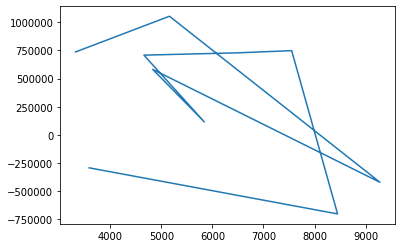

In [24]:
#Reducing inventory level each day
if __name__ == "__main__":
  try:
      no_of_iterations = int(input("Please enter the number of times you wish for the simulation to run: "))
  except:
    print("Please enter an integer")
  Supplier_Countries, us = Dataframe_Load()
  Supplier_Countries = value_add(Supplier_Countries)
  Supplier_Countries = distance_calc(Supplier_Countries, us)
  manufacturing_inventory = manufacturing_inventory_load()
  day = 1
  flag = 0
  count_days = -1
  profits = []
  inventory = 0
  losses = 0
  no_ordered = 0
  order_losses  = []
  costs = 0
  count = 0
  each_order_qty = []
  qty = random.randint(4000,10000)
  days_lost = 0
  Df1 = Supplier_func_Week(Supplier_Countries.copy())
  list_req2 = []
  list_req2 = orders(manufacturing_inventory, qty)
  print(Df1)
  Df2 = Supply_run(percentage_distr(list_req2[0],list_req2[1],list_req2[2],Df1))
  print(Df2)

  

  for i in range(0,no_of_iterations):
    qty = random.randint(2000,10000)    
    each_order_qty.append(qty)
    no_ordered += qty
    loss2 = 0
    costs_per_order = 0
    inventory_per_order = 0
    profit_per_order = 0
    for i in range(0,days_to_complete(qty)):
      count_days = count_days + 1
      supply_df = Df2.loc[Df2.Time_Taken == count_days]
      if count_days%10 ==0 and count_days > 0:
        list_req = orders(manufacturing_inventory, (qty))
        Df2 = Supply_run(percentage_distr(list_req[0],list_req[1],list_req[2],Df1))
        no_of_iter = count_days/10
        Df2['Time_Taken'] = Df2.Time_Taken + (10*no_of_iter)
        supply_df = Df2.loc[Df2.Time_Taken == count_days]
        print(Df2) 
      print("The materials supplied this iteration are:- \n", supply_df)
      if len(supply_df) > 0:
        if len(supply_df.loc[supply_df.Material == 'Material_1']) > 0:
          manufacturing_inventory.at[0, 'In_Factory'] = manufacturing_inventory.iloc[0].In_Factory + supply_df.loc[supply_df.Material == 'Material_1'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_1'].Total_Costs.sum()   
        if len(supply_df.loc[supply_df.Material == 'Material_2']) > 0:
          manufacturing_inventory.at[1, 'In_Factory'] = manufacturing_inventory.iloc[1].In_Factory + supply_df.loc[supply_df.Material == 'Material_2'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_2'].Total_Costs.sum()
        if len(supply_df.loc[supply_df.Material == 'Material_3']) > 0:
          manufacturing_inventory.at[2, 'In_Factory'] = manufacturing_inventory.iloc[2].In_Factory + supply_df.loc[supply_df.Material == 'Material_3'].Volume.sum()
          costs_per_order = costs_per_order +  supply_df.loc[supply_df.Material == 'Material_3'].Total_Costs.sum()
      print(costs_per_order)
      print(f"Day : {day}")

      for index, row in manufacturing_inventory.iterrows():
        if min(manufacturing_inventory["In_Factory"]) <= 0:
          flag = 1
          break  
        count +=1
        sub = row['In_Factory']- row['Needed_Daily']
        if sub<= 0 :
          manufacturing_inventory.at[index,'In_Factory'] = 0
          flag = 1
        else:
          #manufacturing_inventory.iloc[index].replace(to_replace=row['In_Factory'], value = sub)
          manufacturing_inventory.at[index,'In_Factory'] = sub
          flag = 0
      day+=1
      print(manufacturing_inventory)
      if flag !=1:
        inventory = inventory + 40
        inventory_per_order += 40
      else:
        days_lost = days_lost + 1
        losses = losses + 40
        loss2 = losses
        print("Inventory is: ", inventory)
    order_losses.append(loss2)
    costs+= costs_per_order
    profit_for_order = (inventory_per_order*370) - costs_per_order
    profits.append(profit_for_order)
    print("The profit obtained for this order is ", profit_for_order)
    print("Inventory made for this order is ", inventory_per_order)
    print("Costs for each order ", costs_per_order)
  
  #---------------------#

  
  try:
    var0 = costs/no_ordered
    inventory_lost = (days_lost/no_of_iterations)*40
    print("Total Losses made are: ", inventory_lost*var0)
    print(f"Average Optimized cost for order quantity of {no_ordered} orders is: {(costs/no_of_iterations)}")
    print(f"Average Optimized days lost is: {(days_lost/no_of_iterations)}")
    print(f"Average Optimized price per good is: {(costs/inventory)}")
    print(f"Average Optimized price per good should have been: {(var0)}")
  except:
    pass
  print("Quantity to yield highest profit was: ", each_order_qty[profits.index(max(profits))])  
  plt.plot(each_order_qty,profits)
  plt.show()
